<a href="https://colab.research.google.com/github/ggalarza1/Car_Industry_Tickers/blob/main/thecarindustry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  5 of 5 completed


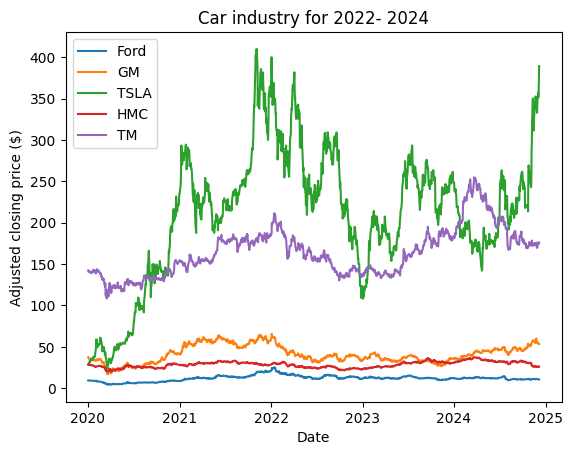

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

tickers = ['F', 'GM', 'TSLA','HMC', 'TM']

start_date = '2020-1-01'
end_date = '2024-12-08'

panel_data = yf.download(tickers, start=start_date, end=end_date)

panel_data.head(9)

# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
close = panel_data['Close']

# Getting all weekdays between 01/01/2020 and 12/08/2024
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# Reindex close using all_weekdays as the new index
close = close.reindex(all_weekdays)

# Reindexing will insert missing values (NaN) for the dates that were not present
# in the original set. To cope with this, we can fill the missing by replacing them
# with the latest available price for each instrument.
close = close.ffill()

#print(all_weekdays)

close.head(10)

close.describe()

# Get the MSFT timeseries. This now returns a Pandas Series object indexed by date.
ford = close.loc[:, 'F']
gm = close.loc[:, 'GM']
tsla = close.loc[:, 'TSLA']
honda = close.loc[:, 'HMC']
toyota = close.loc[:, 'TM']

#print(ford)

# Plot everything with matplotlib
#fig, ax = plt.subplots(figsize=(16,9))
fig, ax = plt.subplots()

ax.plot(ford.index, ford, label='Ford')
ax.plot(gm.index, gm, label='GM')
ax.plot(tsla.index, tsla, label='TSLA')
ax.plot(honda.index, honda, label='HMC')
ax.plot(toyota.index, toyota, label='TM')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.set_title(label= 'Car industry for 2022- 2024', loc='center')
ax.legend()